In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
import numpy as np

In [2]:
df_training_set = pd.read_csv("training_set_features.csv", na_values='?')

In [3]:
df_training_labels = pd.read_csv("training_set_labels.csv", na_values='?')

In [4]:
len(df_training_set)

26707

In [5]:
len(df_training_labels)

26707

In [6]:
df_training_labels.columns

Index(['respondent_id', 'h1n1_vaccine', 'seasonal_vaccine'], dtype='object')

In [7]:
df_training_set.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [8]:
print(len(df_training_labels.columns))
print(len(df_training_set.columns))

3
36


In [9]:
df_training_set.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [10]:
df_training_labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


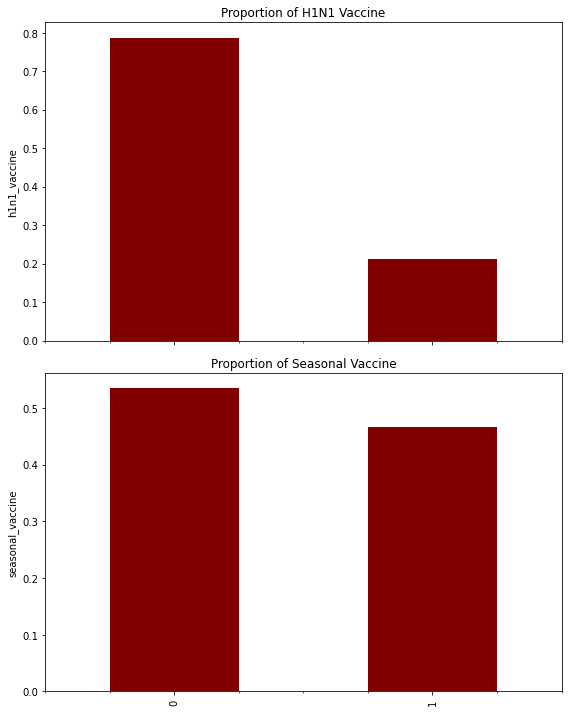

In [11]:
# see the distribution of the two target variables. 
# 'seasonal_vaccine' target is more balanced

fig, ax = plt.subplots(2, 1, sharex=True, figsize = (8,10))

n_obs = df_training_labels.shape[0]

(df_training_labels['h1n1_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.bar(title="Proportion of H1N1 Vaccine", ax=ax[0], color = 'maroon')
)
ax[0].set_ylabel("h1n1_vaccine")

(df_training_labels['seasonal_vaccine']
    .value_counts()
    .div(n_obs)
    .plot.bar(title="Proportion of Seasonal Vaccine", ax=ax[1], color = 'maroon')
)
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [12]:
# Phi Coefficient is the same as Pearson for two binary variables
(df_training_labels["h1n1_vaccine"]
     .corr(df_training_labels["seasonal_vaccine"], method="pearson")
)

0.37714265306144623

In [13]:
# how many categories in the 'employment_industry' feature
len(df_training_set['employment_industry'].value_counts())

21

In [14]:
# # how many categories in the 'employment_occupation' feature
len(df_training_set['employment_occupation'].value_counts())

23

In [15]:
# concatenate 'training_set_features' and 'training_labels' datasets 
df = pd.concat([df_training_labels,df_training_set], axis = 1)

In [16]:
df.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,0,1,1,3.0,2.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,0,0,2,1.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,0,1,3,1.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,0,0,4,2.0,1.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [17]:
df.shape[1]

39

In [18]:
df.shape[0]

26707

In [19]:
# drop the id column
df.drop(['respondent_id'], axis = 1, inplace = True)

In [20]:
df.shape

(26707, 37)

In [21]:
df.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [22]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [23]:
# plan:
# impute missing values (knn imputer)
# drop rows that are missing values for important columns
# do feature engineering
# draw correlations
# drop strongly correlated features
#  do a heatmap
# grid search cv
# SimpleImputer
# pipelines
# impute missing values with knn
# one hot encoding

In [24]:
# is the 'seasonal_vaccine' column missing any values?
df['seasonal_vaccine'].isna().value_counts()

False    26707
Name: seasonal_vaccine, dtype: int64

In [25]:
# is the 'h1n1_vaccine' column missing any values?
df['h1n1_vaccine'].isna().value_counts()

False    26707
Name: h1n1_vaccine, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

In [27]:
# encode the 'age_group' feature values into a numeric form
df['age_group'].replace({ '18 - 34 Years' : 1, '35 - 44 Years' : 2, '45 - 54 Years' : 3,'55 - 64 Years' : 4,'65+ Years' : 5 }, inplace = True)


In [28]:
# encode the 'education' feature values into a numeric form
df['education'].replace({ '< 12 Years' : 1, '12 Years' : 2, 'Some College' : 3,'College Graduate' : 4}, inplace = True)

In [29]:
# encode the 'race' feature values into a numeric form
df['race'].replace({ 'Black' : 1, 'Hispanic' : 2, 'White' : 3,'Other or Multiple' : 4}, inplace = True)

In [30]:
# encode the 'sex' feature values into a numeric form
df['sex'].replace({ 'Female' : 1, 'Male' : 2}, inplace = True)

In [31]:
# encode the 'income_poverty' feature values into a numeric form
df['income_poverty'].replace({ 'Below Poverty' : 1, '> $75,000' : 2,'<= $75,000, Above Poverty' : 3}, inplace = True)

In [32]:
# encode the 'marital_status' feature values into a numeric form
df['marital_status'].replace({ 'Married' : 1, 'Not Married' : 2}, inplace = True)

In [33]:
# encode the 'rent_or_own' feature values into a numeric form
df['rent_or_own'].replace({ 'Rent' : 1, 'Own' : 2}, inplace = True)

In [34]:
# encode the 'employment_status' feature values into a numeric form
df['employment_status'].replace({ 'Unemployed' : 1, 'Not in Labor Force' : 2,'Employed' : 3}, inplace = True)

In [35]:
# encode the 'hhs_geo_region' feature values into a numeric form
df['hhs_geo_region'].replace({ 'lzgpxyit' : 1, 'fpwskwrf' : 2, 'qufhixun' : 3,'oxchjgsf' : 4,'kbazzjca' : 5, 'bhuqouqj' : 6, 'mlyzmhmf' : 7, 'lrircsnp' : 8,'atmpeygn' : 9, 'dqpwygqj' : 10 }, inplace = True)

In [36]:
# encode the 'census_msa' feature values into a numeric form
df['census_msa'].replace({ 'Non-MSA' : 1, 'MSA, Not Principle  City' : 2,'MSA, Principle City' : 3}, inplace = True)

In [37]:
df['employment_occupation'].isna().value_counts()

True     13470
False    13237
Name: employment_occupation, dtype: int64

In [38]:
df['employment_industry'].isna().value_counts()

False    13377
True     13330
Name: employment_industry, dtype: int64

In [39]:
# drop 'employment_occupation' and 'employment_industry' features because too many (~50 %)
# of the data is null.

In [40]:
df.drop(columns = ['employment_occupation','employment_industry'], inplace = True)

In [41]:
df.head()

,h1n1_vaccine,seasonal_vaccine,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1.0,2.0,2.0,2.0,4,1,0.0,0.0
1,0,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,...,3,2,1.0,2.0,1.0,3.0,6,2,0.0,0.0
2,0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3,2,3.0,2.0,2.0,3.0,3,2,2.0,0.0
3,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,1.0,2.0,1.0,2.0,8,3,0.0,0.0
4,0,0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,3.0,1.0,2.0,3.0,3,2,1.0,0.0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_vaccine                 26707 non-null  int64  
 1   seasonal_vaccine             26707 non-null  int64  
 2   h1n1_concern                 26615 non-null  float64
 3   h1n1_knowledge               26591 non-null  float64
 4   behavioral_antiviral_meds    26636 non-null  float64
 5   behavioral_avoidance         26499 non-null  float64
 6   behavioral_face_mask         26688 non-null  float64
 7   behavioral_wash_hands        26665 non-null  float64
 8   behavioral_large_gatherings  26620 non-null  float64
 9   behavioral_outside_home      26625 non-null  float64
 10  behavioral_touch_face        26579 non-null  float64
 11  doctor_recc_h1n1             24547 non-null  float64
 12  doctor_recc_seasonal         24547 non-null  float64
 13  chronic_med_cond

In [43]:
df['race'].isna().value_counts()

False    26707
Name: race, dtype: int64

In [44]:
df['behavioral_face_mask'].isna().sum()

19

In [45]:
# the number of null values in each column
df.isna().sum()

h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
i

In [46]:
# 'health_insurance' column is missing 46 % of the values so we want to drop this column
df.drop('health_insurance', axis = 1, inplace = True)

In [47]:
df.shape

(26707, 34)

In [48]:
df_target = df[['h1n1_vaccine','seasonal_vaccine']]

In [49]:
df_target

,h1n1_vaccine,seasonal_vaccine
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1
26705,0,0


In [50]:
# recreate the dataframe with only input features
df_input = df.drop(columns = ['h1n1_vaccine','seasonal_vaccine'])

In [51]:
# Use kNN imputation for missing values
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(df_input)
df_input_transformed = imputer.transform(df_input)
# transfrom method created nd.array out of 'df_input' dataframe

In [52]:
len(df_input_transformed)

26707

In [53]:
# we convert the array back into dataframe
df_input1 = pd.DataFrame(df_input_transformed, columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'])
df_input1

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,2.0,2.0,2.0,4.0,1.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3.0,2.0,1.0,2.0,1.0,3.0,6.0,2.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,3.0,2.0,2.0,3.0,3.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3.0,1.0,1.0,2.0,1.0,2.0,8.0,3.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,3.0,1.0,2.0,3.0,3.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3.0,2.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,3.0,2.0,2.0,2.2,1.0,2.0,0.0,0.0
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,...,2.0,1.0,3.0,1.0,1.0,3.0,8.0,1.0,1.0,0.0


In [54]:
# concatenate 'df_target' and 'df_input1' datasets 
df = pd.concat([df_target,df_input1], axis = 1)

In [55]:
df.isna().sum()

h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='sex'>

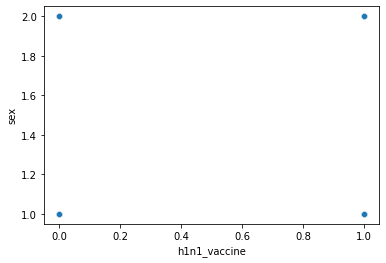

In [56]:
sns.scatterplot(x = df['h1n1_vaccine'], y = df['sex'])

In [57]:
df.columns

Index(['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

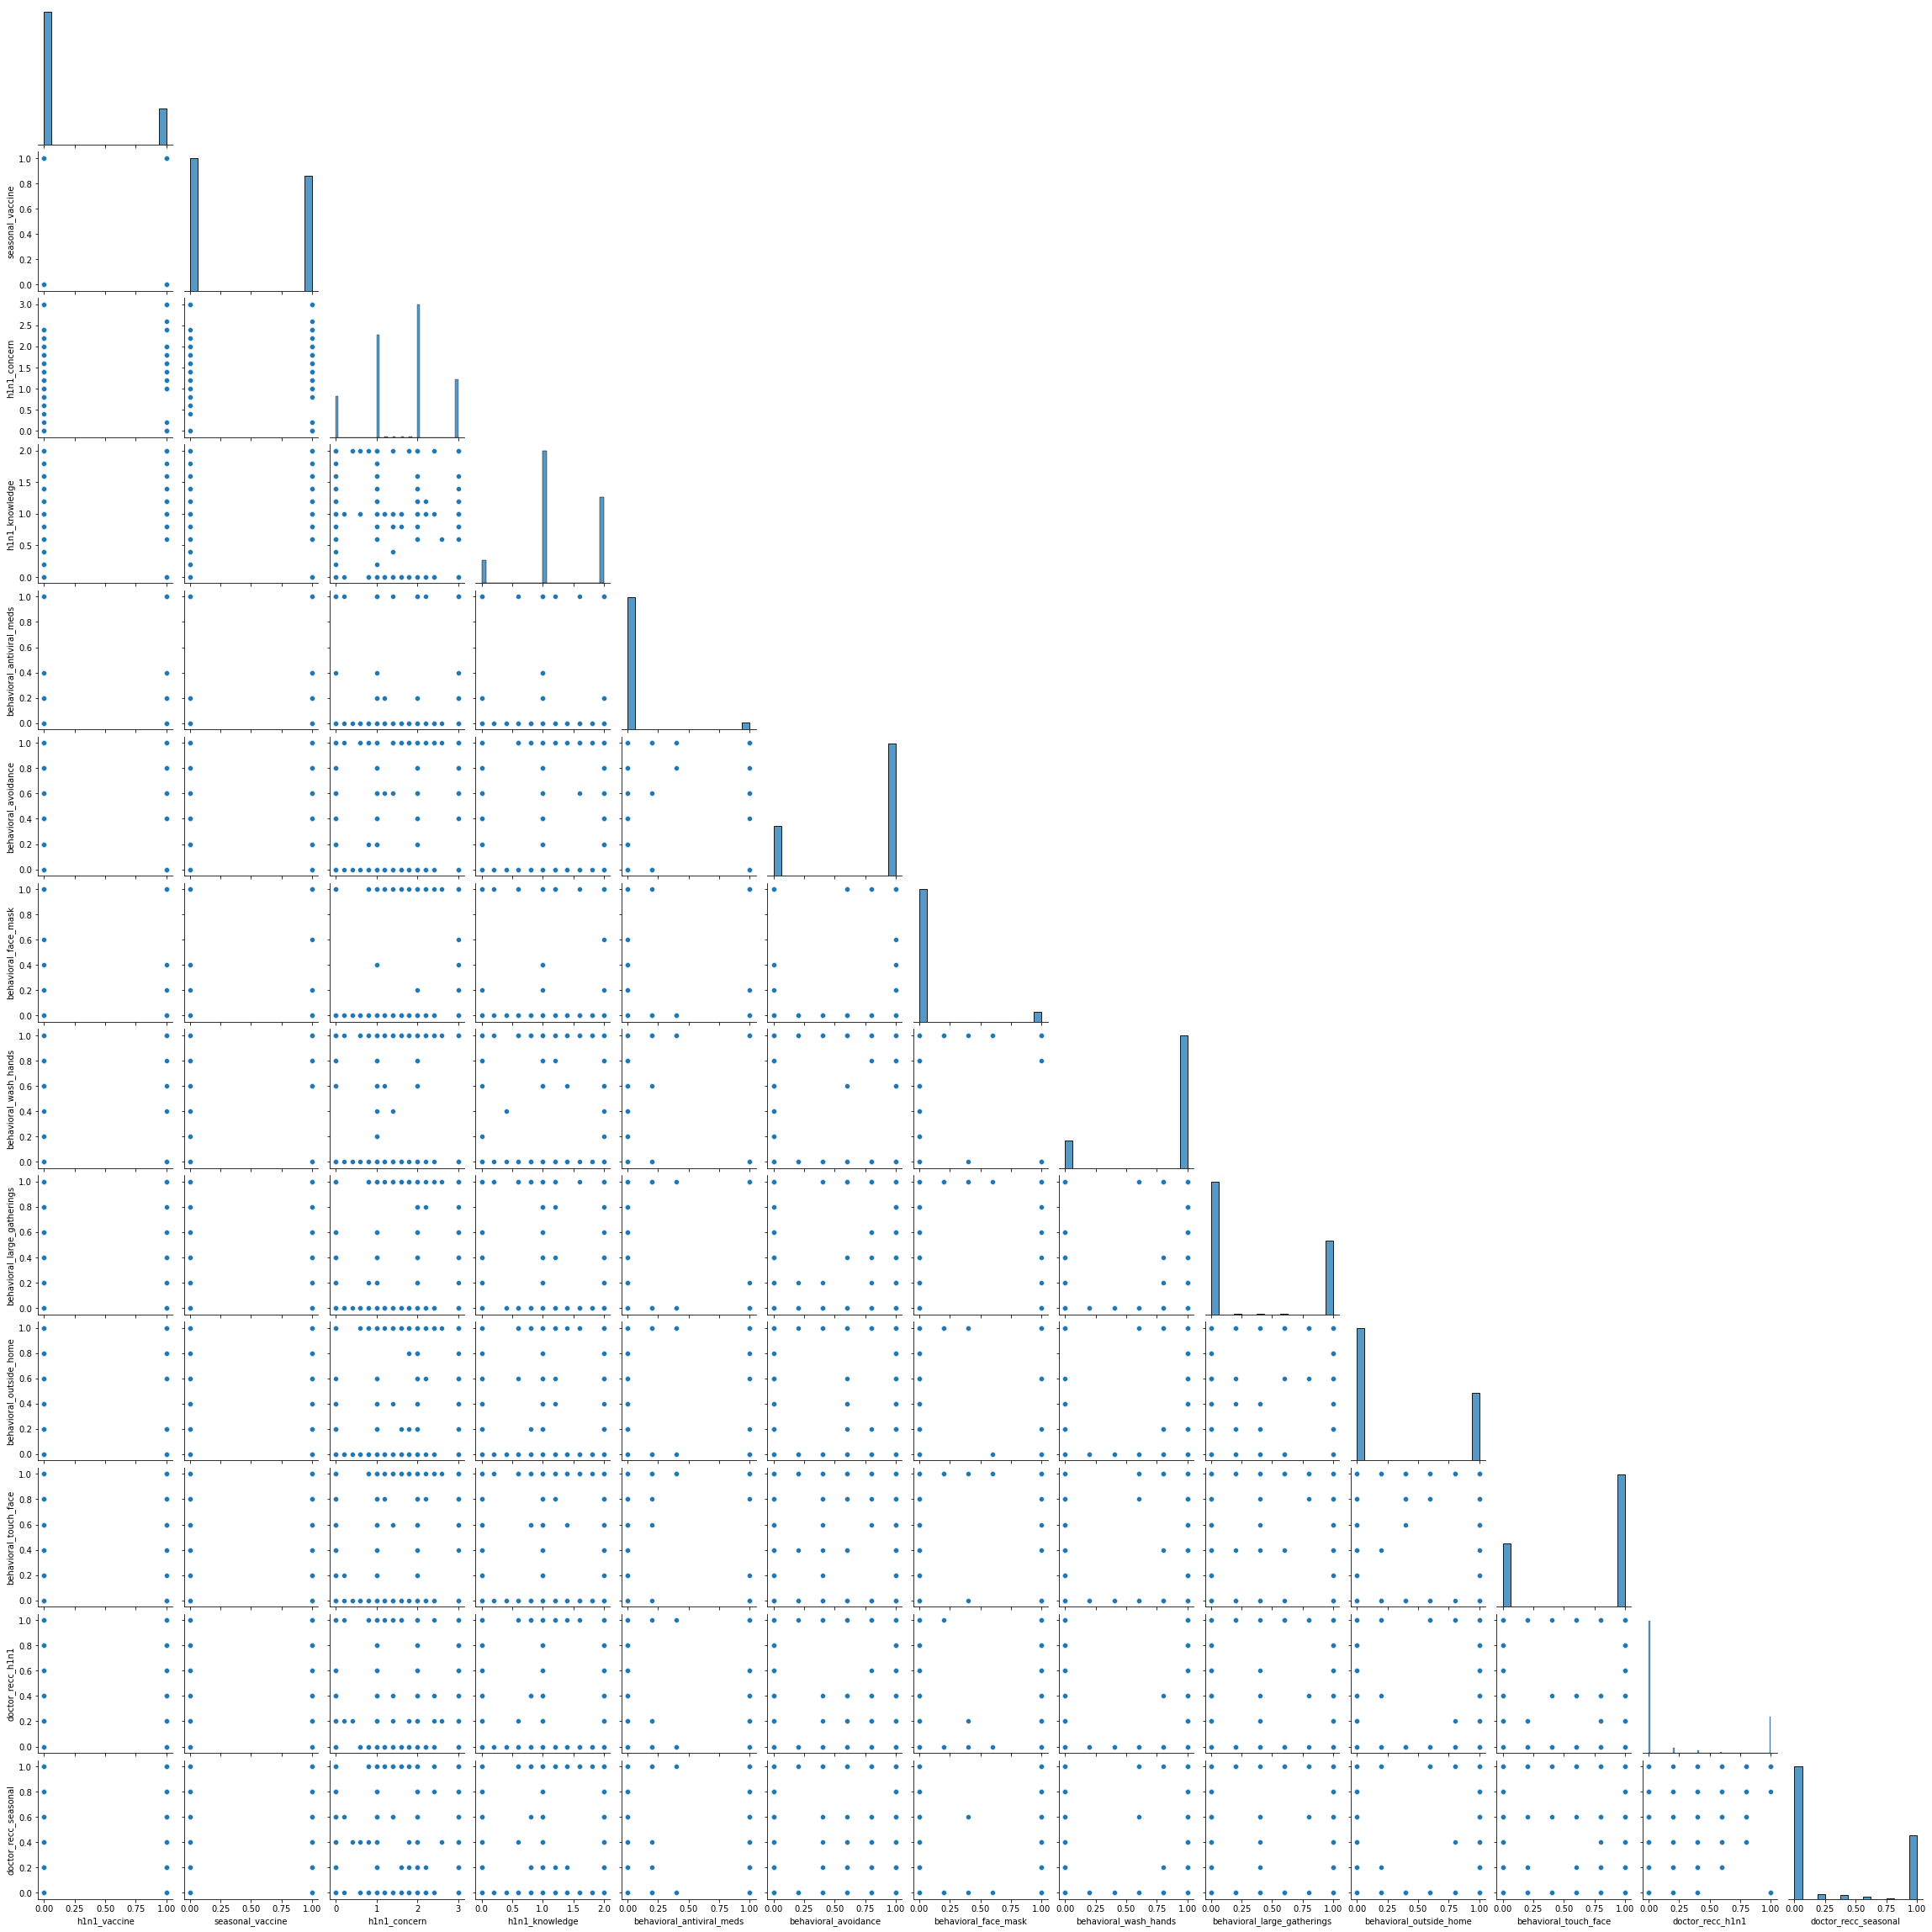

In [58]:

scatter_columns = ['h1n1_vaccine', 'seasonal_vaccine', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal']

df_scatter = df[scatter_columns]

sns.pairplot(df_scatter, corner=True);

In [59]:
df.isna().sum()

h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [60]:
# 'income_poverty' column is missing 16.5 % of the values so we will drop this column
df.drop('income_poverty', axis = 1, inplace = True)

In [61]:
df.isna().sum()

h1n1_vaccine                   0
seasonal_vaccine               0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [62]:
# Phi Coefficient is the same as Pearson for two binary variables
(df["h1n1_vaccine"]
     .corr(df["seasonal_vaccine"], method="pearson")
)

0.37714265306144623

In [63]:
# list of binary features
binary_list = ['behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask','behavioral_wash_hands' , 'behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face' , 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker']

In [64]:
def phi_coef(data,target_feature, list_features):
    phi_list = []
    for feature in list_features:
        
        phi = data[feature].corr(data[target_feature], method="pearson")
        my_tuple = (feature, phi)
        phi_list.append(my_tuple)
        #print("Phi coeff for 'seasonal_vaccine' with " + feature + " is " + str (phi))
    return phi_list

In [65]:
phi_list_tuples = phi_coef(df,'seasonal_vaccine',binary_list)

In [66]:
phi_list_tuples.sort(key=lambda y: y[1], reverse = True)

print(phi_list_tuples)

[('doctor_recc_seasonal', 0.3599422799235485), ('doctor_recc_h1n1', 0.1952311035447187), ('chronic_med_condition', 0.16980025755822628), ('health_worker', 0.12662437311414068), ('behavioral_touch_face', 0.1197188116923939), ('behavioral_wash_hands', 0.11240669393788624), ('behavioral_avoidance', 0.0765093188774533), ('behavioral_large_gatherings', 0.06398721519113602), ('behavioral_outside_home', 0.05355551198418157), ('behavioral_face_mask', 0.05003247175739391), ('child_under_6_months', 0.012411404388520206), ('behavioral_antiviral_meds', 0.006403172145252698)]


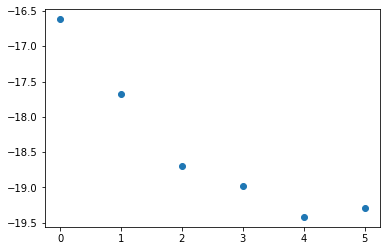

In [67]:
>>> import matplotlib.pyplot as plt
>>> testList =[(0, 6.0705199999997801e-08), (1, 2.1015700100300739e-08), 
 (2, 7.6280656623374823e-09), (3, 5.7348209304555086e-09), 
 (4, 3.6812203579604238e-09), (5, 4.1572516753310418e-09)]
>>> from math import log
>>> testList2 = [(elem1, log(elem2)) for elem1, elem2 in testList]
>>> testList2
[(0, -16.617236475334405), (1, -17.67799605473062), (2, -18.691431541177973), (3, -18.9767093108359), (4, -19.420021520728017), (5, -19.298411635970396)]
>>> zip(*testList2)
[(0, 1, 2, 3, 4, 5), (-16.617236475334405, -17.67799605473062, -18.691431541177973, -18.9767093108359, -19.420021520728017, -19.298411635970396)]
>>> plt.scatter(*zip(*testList2))
>>> plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

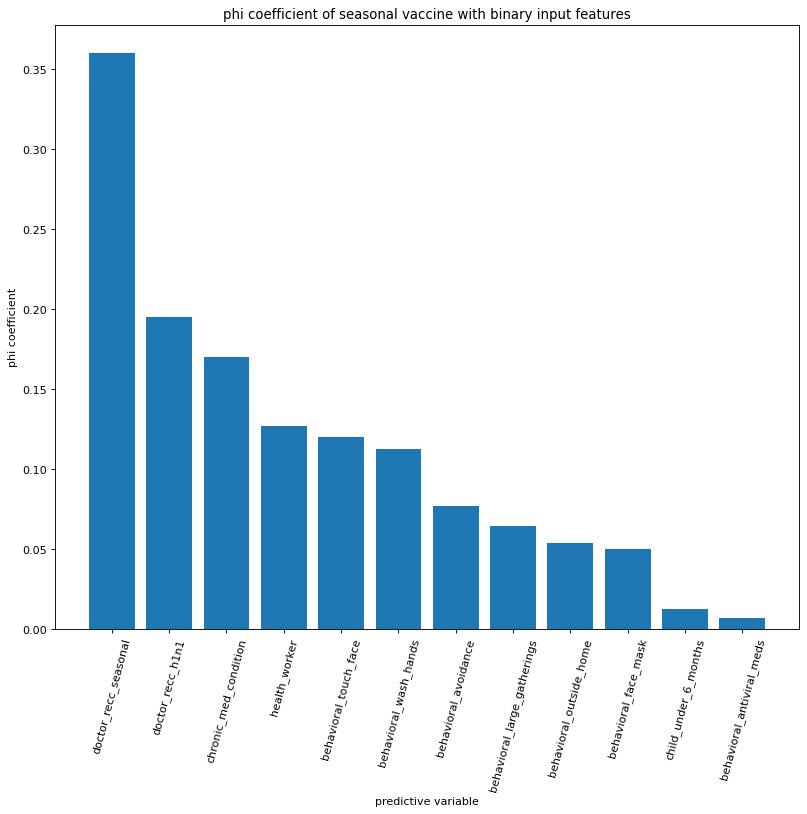

In [68]:
from matplotlib.pyplot import figure

figure(figsize=(12, 10), dpi=80)


plt.bar(*zip(*phi_list_tuples))
plt.xlabel('predictive variable')
plt.ylabel('phi coefficient')
plt.title("phi coefficient of seasonal vaccine with binary input features")
plt.xticks( rotation='75')

In [ ]:
# building a baseline model
